Imports as in maze.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display
import random

# Implemented methods
methods = ['DynProg', 'ValIter']

# Some colours
LIGHT_RED    = '#FFC4CC'
LIGHT_GREEN  = '#95FD99'
BLACK        = '#000000'
WHITE        = '#FFFFFF'
LIGHT_PURPLE = '#E8D0FF'

Importing from maze.py

In [2]:
from maze import Maze, dynamic_programming, value_iteration, animate_solution

Creating the maze and solving the MPD with DP:

In [3]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]])
# With the convention 0 = empty cell, 1 = obstacle, 2 = exit of the Maze

env = Maze(maze, True) # Create an environment maze
horizon = 20 # TODO: Finite horizon

# Solve the MDP problem with dynamic programming
V, policy = dynamic_programming(env, horizon)
print(V.shape, (V.min(), V.max()))
print(policy.shape, (policy.min(), policy.max()))

(2242, 20) (np.float64(-1900.0), np.float64(19.0))
(2242, 20) (np.float64(0.0), np.float64(4.0))


Now simulate using the obtained policy:

In [4]:
# Simulate the shortest path starting from position A
method = 'DynProg'
start  = ((0,0), (6,5))
path = env.simulate(start, policy, method)[0]
path

[((0, 0), (6, 5)),
 ((0, 1), (5, 5)),
 ((1, 1), (4, 5)),
 ((2, 1), (5, 5)),
 ((3, 1), (6, 5)),
 ((4, 1), (6, 4)),
 ((4, 2), (5, 4)),
 ((4, 3), (5, 4)),
 ((4, 3), (6, 4)),
 ((4, 4), (6, 3)),
 ((4, 5), (6, 2)),
 ((4, 6), (6, 2)),
 ((4, 7), (6, 3)),
 ((5, 7), (6, 2)),
 ((6, 7), (5, 2)),
 ((6, 6), (6, 2)),
 'Win',
 'Win',
 'Win',
 'Win']

Animate this path, along with the value function:

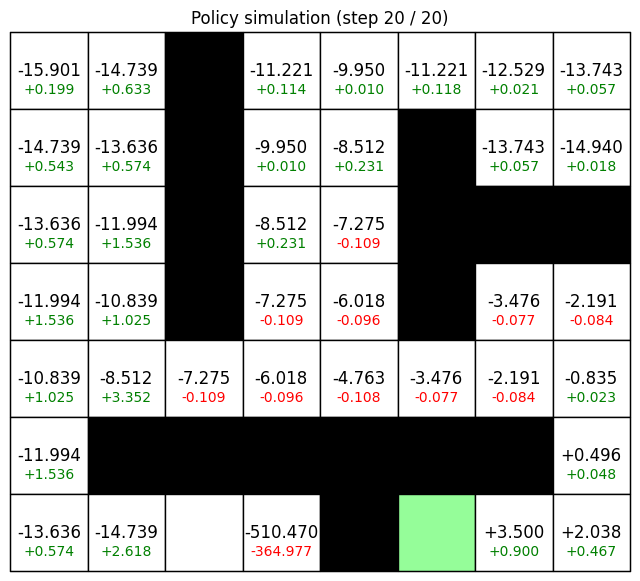

In [5]:
animate_solution(maze, path, V.T[0], env.map, 'outputs/values_both_minotaurstay/', 1.0)

Run many simulations, record if player wins or loses:

Simulated 25 episodes at T=1, agent won 0.0 of them, for a win percentage of 0.000%
Simulated 25 episodes at T=2, agent won 0.0 of them, for a win percentage of 0.000%
Simulated 25 episodes at T=3, agent won 0.0 of them, for a win percentage of 0.000%
Simulated 25 episodes at T=4, agent won 0.0 of them, for a win percentage of 0.000%
Simulated 25 episodes at T=5, agent won 0.0 of them, for a win percentage of 0.000%
Simulated 25 episodes at T=6, agent won 0.0 of them, for a win percentage of 0.000%
Simulated 25 episodes at T=7, agent won 0.0 of them, for a win percentage of 0.000%
Simulated 25 episodes at T=8, agent won 0.0 of them, for a win percentage of 0.000%
Simulated 25 episodes at T=9, agent won 0.0 of them, for a win percentage of 0.000%
Simulated 25 episodes at T=10, agent won 0.0 of them, for a win percentage of 0.000%
Simulated 25 episodes at T=11, agent won 0.0 of them, for a win percentage of 0.000%
Simulated 25 episodes at T=12, agent won 0.0 of them, for a win percentage

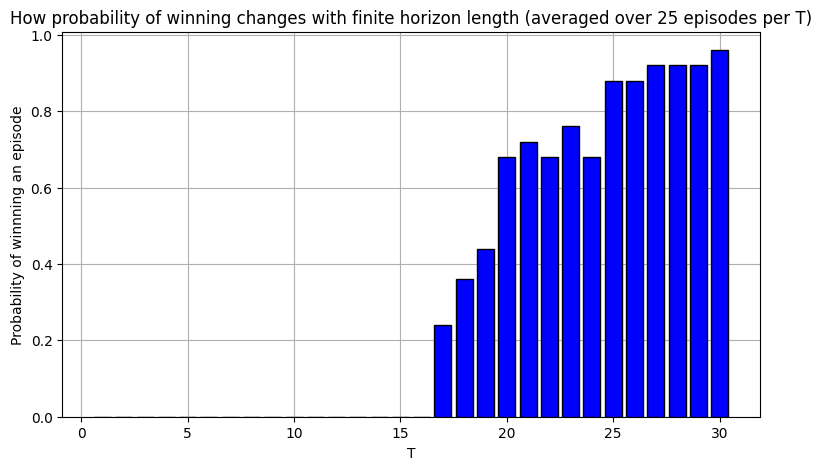

In [6]:
method = 'DynProg'
start  = ((0,0), (6,5))

T_end = 30
won_episodes = np.zeros((T_end,))
n_episodes = 25

since = time.time()
for t in range(T_end):
    for i in range(n_episodes):
        _, policy = dynamic_programming(env, t+1)
        path = env.simulate(start, policy, method)[0]
        if ('Win' in path) and not ('Eaten' in path):
            won_episodes[t] += 1.0
    print(f"Simulated {n_episodes} episodes at T={t+1}, agent won {won_episodes[t]} of them, for a win percentage of {100.0 * won_episodes[t] / n_episodes:0.3f}%")
print(f"Total process took {time.time() - since:0.3f} seconds.")

fig, ax = plt.subplots(figsize=(9,5))
ax.grid(zorder=0)
ax.bar(np.arange(1, T_end + 1), won_episodes / n_episodes, color='blue', edgecolor='black', zorder=3)
ax.set_xlabel('T')
ax.set_ylabel('Probability of winnning an episode')
ax.set_title(f'How probability of winning changes with finite horizon length (averaged over {n_episodes} episodes per T)')
fig.savefig(f'outputs/1d/probability_plot_minotaurstay.png', bbox_inches='tight')